# Imports

In [4]:
import numpy as np
import os

import soundfile as sf
import librosa.display as ld
import librosa

import matplotlib.pyplot as plt

from IPython.display import Audio

# 1 - Input processing

In [55]:
sf.available_formats()

{'AIFF': 'AIFF (Apple/SGI)',
 'AU': 'AU (Sun/NeXT)',
 'AVR': 'AVR (Audio Visual Research)',
 'CAF': 'CAF (Apple Core Audio File)',
 'FLAC': 'FLAC (Free Lossless Audio Codec)',
 'HTK': 'HTK (HMM Tool Kit)',
 'SVX': 'IFF (Amiga IFF/SVX8/SV16)',
 'MAT4': 'MAT4 (GNU Octave 2.0 / Matlab 4.2)',
 'MAT5': 'MAT5 (GNU Octave 2.1 / Matlab 5.0)',
 'MPC2K': 'MPC (Akai MPC 2k)',
 'OGG': 'OGG (OGG Container format)',
 'PAF': 'PAF (Ensoniq PARIS)',
 'PVF': 'PVF (Portable Voice Format)',
 'RAW': 'RAW (header-less)',
 'RF64': 'RF64 (RIFF 64)',
 'SD2': 'SD2 (Sound Designer II)',
 'SDS': 'SDS (Midi Sample Dump Standard)',
 'IRCAM': 'SF (Berkeley/IRCAM/CARL)',
 'VOC': 'VOC (Creative Labs)',
 'W64': 'W64 (SoundFoundry WAVE 64)',
 'WAV': 'WAV (Microsoft)',
 'NIST': 'WAV (NIST Sphere)',
 'WAVEX': 'WAVEX (Microsoft)',
 'WVE': 'WVE (Psion Series 3)',
 'XI': 'XI (FastTracker 2)'}

In [56]:
# example_path = '/home/usuaris/veu/federico.costa/datasets/voxceleb1/test/id10270/5r0dWxy17C8/00001.wav'
example_path = '/home/usuaris/veu/federico.costa/datasets/voxceleb2/dev/id09088/0Gu9RMUpnko/00001.m4a'
# example_path = 'audiosPath/stereo_file.wav'

Audio(example_path)

# 2 - Original code

In [60]:
path = "/home/usuaris/veu/federico.costa/git_repositories/DoubleAttentionSpeakerVerification/files_directories/feature_extractor/feature_extractor_paths.lst"

with open(path,'r') as filesFile:
    
    num_lines = sum(1 for line in filesFile)

In [61]:
num_lines

2

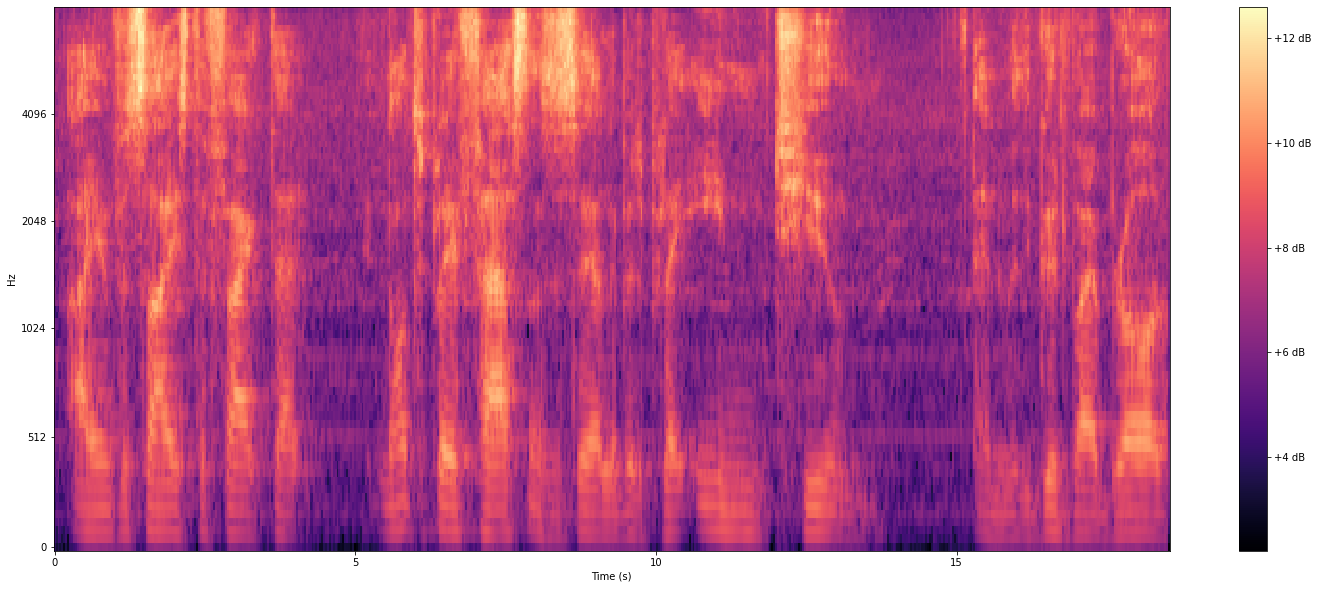

In [59]:
samples, sampling_rate = librosa.load(
    path = example_path,
    sr = 16000,
)

preem_coef = 0.97
samples *= 32768 # no idea why!

samples[1:] = samples[1:] - preem_coef * samples[:-1]
samples[0] *= (1 - preem_coef)

# Each frame of audio is windowed by window of length win_length and then padded with zeros to match n_fft.

n_fft = 512 # corresponds to 23 miliseconds
window_stride = 0.010
window_size = 0.023
window = 'hamming'

hop_length = int(sampling_rate * window_stride)
win_length = int(sampling_rate * window_size)

S = librosa.stft(
    y = samples, 
    n_fft = n_fft, 
    hop_length = hop_length, 
    win_length = win_length, 
    window = window, 
    center = False
)

D = np.abs(S)

n_mels = 80
lowfreq = 0
highfreq = sampling_rate / 2

mel_spectrogram = librosa.feature.melspectrogram(
    S = D, 
    sr = sampling_rate, 
    n_mels = n_mels, 
    fmin = lowfreq, 
    fmax = highfreq, 
    norm = None,
)

mel_spectrogram = np.log(np.maximum(1, mel_spectrogram))

plt.figure(figsize=(25, 10))

librosa.display.specshow(
    mel_spectrogram, 
    x_axis = "s",
    y_axis = "mel", 
    sr = sampling_rate,
    )

plt.colorbar(format="%+2.f dB")
plt.show()

# 3 -  Tests

In [ ]:
plt.figure(figsize = (15, 4))

samples, sampling_rate = librosa.load(
    path = example_path,
    mono = True,
)

librosa.display.waveshow(
  samples, 
  alpha = 0.5
)

plt.ylabel("amplitude")
plt.title("Audio waveform")
plt.show()

In [ ]:
samples, sampling_rate = librosa.load(example_path)

n_fft = 512 # corresponds to 23 miliseconds
window_stride = 0.010
window_size = 0.023
window = 'hamming'
n_mels = 80
lowfreq = 0
highfreq = sampling_rate / 2
hop_length = int(sampling_rate * window_stride)
win_length = int(sampling_rate * window_size)

mel_spectrogram = librosa.feature.melspectrogram(
    samples, 
    sr = sampling_rate, 
    n_fft = n_fft, 
    hop_length = hop_length, 
    n_mels = n_mels,
    fmin = lowfreq, 
    fmax = highfreq, 
    norm = None,
    )

plt.figure(figsize=(25, 10))

librosa.display.specshow(
    librosa.power_to_db(mel_spectrogram), 
    x_axis = "time",
    y_axis = "mel", 
    sr = sampling_rate,
    )

plt.colorbar(format="%+2.f dB")
plt.show()

In [ ]:
import pickle


path = '/home/usuaris/veu/federico.costa/datasets/voxceleb1/test/id10270/5r0dWxy17C8/0000.pickle'

with open(path, 'rb') as f:
    x = pickle.load(f)

In [ ]:
x.shape